In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mobilenet

## Import package

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from pathlib import Path

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

## Data preprocessing

In [ ]:
train_path = "/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train"
dev_path = "/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/dev"
test_path = "/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/test"

In [ ]:
# Lấy danh sách các file trong thư mục train_path và sắp xếp theo thứ tự
image_files = sorted(os.listdir(train_path))
# Tạo danh sách đầy đủ đường dẫn đến ảnh
full_paths = [os.path.join(train_path, file) for file in image_files]

In [ ]:
full_paths

['/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/0',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/1',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/10',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/11',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/12',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/13',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/14',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/15',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/16',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/17',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/18',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/19',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/2',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/3',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/4',
 '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/train/5',
 '/content/drive/MyDrive/UIT/N

In [ ]:
map_to_id = {
    0 : 0,
    1 : 1,
    2 : 10,
    3 : 11,
    4 : 12,
    5 : 13,
    6 : 14,
    7 : 15,
    8 : 16,
    9 : 17,
    10: 18,
    11: 19,
    12: 2,
    13: 3,
    14: 4,
    15: 5,
    16: 6,
    17: 7,
    18: 8,
    19: 9
}

In [ ]:
label_map = {
    0 : 'Lăng Bác Hồ',
    1 : 'Tràng An Ninh Bình',
    2 : 'Kinh Thành Huế',
    3 : 'Nhà thờ Đức Bà',
    4 : 'Vịnh Hạ Long',
    5 : 'Dinh Độc Lập',
    6 : 'Thánh Địa Mỹ Sơn',
    7 : 'Hồ Gươm',
    8 : 'Bưu điện trung tâm',
    9 : 'Tượng Chúa Giang Tay Vũng Tàu',
    10: 'Cầu vàng bà nà hills',
    11: 'Cột cờ Lũng Cú',
    12: 'Động Phong nha kẻ bàng',
    13: 'Phố Cổ Hội An',
    14: 'thác Bản Giốc',
    15: 'Nhà Thờ Lớn',
    16: 'Chợ Bến thành',
    17: 'Ga Đà Lạt',
    18: 'Chợ Nổi',
    19: 'Gành đá đĩa'
}

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
dev_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_directory(train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 2076 images belonging to 20 classes.


In [ ]:
dev_images = dev_generator.flow_from_directory(dev_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 259 images belonging to 20 classes.


In [ ]:
test_images = test_generator.flow_from_directory(test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 266 images belonging to 20 classes.


In [ ]:
print(train_images.class_indices)
print(dev_images.class_indices)
print(test_images.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}


In [ ]:
model_Mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    weights='imagenet',
)
model_Mobilenet.summary()

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

## Fine-tune Model

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# model.summary()

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=dev_images,
    # batch_size = 32,
    epochs=50,
    steps_per_epoch=train_images.n//train_images.batch_size,
    validation_steps=dev_images.n//dev_images.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True,
            verbose=1  # Hiển thị log của EarlyStopping
        )
    ]
)


Epoch 1/50:   0%|          | 0/3 [13:06<?, ?it/s]


KeyboardInterrupt: 

## Save weights model

## Load weights model

In [ ]:
model.load_weights('/content/drive/MyDrive/UIT/Năm 4/CS406/source_code/weights/mobile_model.keras')

## Inference

In [ ]:
url = '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/test/0/img_0_1.jpg'

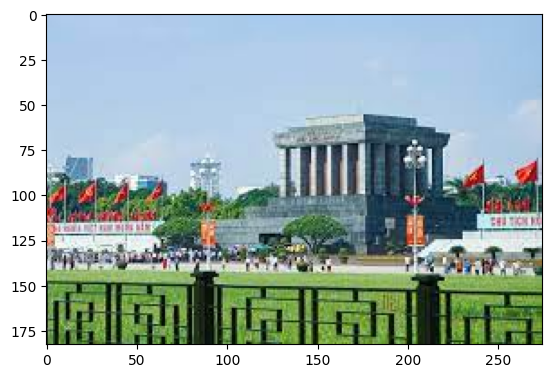

In [ ]:
img = cv2.imread(url)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    # label = map_to_id[y_class[0]]
    reversed_dict = {v: k for k, v in train_images.class_indices.items()}
    label = reversed_dict[y_class[0]]
    place = label_map[int(label)]

    return place

In [ ]:
place = output(url)
print(place)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Lăng Bác Hồ


## Result on test data

In [ ]:
labels = []
for item in os.listdir(train_path):
  labels.append(item)

In [ ]:
def read_data(dir_path):
  image_list = []
  y = []
  for label in labels:
    path = os.path.join(dir_path, label)
    for item in os.listdir(path):
      image_list.append(path + '/' + item)
      y.append(int(label))
  return image_list, y

In [ ]:
X_test, y_test = read_data(test_path)
print(len(X_test))
print(len(y_test))

268
268


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    # label = map_to_id[y_class[0]]
    reversed_dict = {v: k for k, v in train_images.class_indices.items()}
    label = reversed_dict[y_class[0]]

    return int(label)

In [ ]:
y_pred = []
for item in X_test:
  label = output(item)
  y_pred.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [ ]:
acc = accuracy_score(y_pred, y_test)
print("Accuracy:", acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.9104477611940298
Precision: 0.9087912087912088
Recall: 0.9176508295625944
F1-Score: 0.9068527351984332


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.77      0.67      0.71        15
           2       0.92      0.86      0.89        14
           3       0.79      1.00      0.88        11
           4       1.00      0.82      0.90        17
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.96        13
           7       1.00      0.87      0.93        15
           8       0.92      0.80      0.86        15
           9       0.92      0.92      0.92        13
          10       1.00      1.00      1.00        13
          11       0.85      0.92      0.88        12
          12       0.85      0.79      0.81        14
          13       0.54      1.00      0.70         7
          14       0.77      1.00      0.87        10
          15       1.00      0.93      0.97        15
          16       1.00      0.93      0.96        14
          17       1.00    

# Resnet50

## Import packages

In [ ]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

## Data preprocessing

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
dev_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_directory(train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 2076 images belonging to 20 classes.


In [ ]:
dev_images = dev_generator.flow_from_directory(dev_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 259 images belonging to 20 classes.


In [ ]:
test_images = test_generator.flow_from_directory(test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 266 images belonging to 20 classes.


## Fine-tune Model

In [ ]:
model_ResNet50 = ResNet50(
    input_shape=(224, 224, 3),
    weights='imagenet',
)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_ResNet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Tải ResNet50 pre-trained
pretrained_model = ResNet50(
    weights='imagenet',  # Sử dụng trọng số được pre-trained trên ImageNet
    include_top=False,   # Không bao gồm lớp fully connected phía trên cùng
    input_shape=(224, 224, 3)  # Định nghĩa kích thước input
)

# Freeze các lớp trong ResNet50
for layer in pretrained_model.layers:
    layer.trainable = False

# Thêm các lớp phía trên ResNet50
x = pretrained_model.output
x = GlobalAveragePooling2D()(x)  # Lấy trung bình toàn bộ feature map
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Giảm overfitting bằng Dropout
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Lớp đầu ra với 20 class (softmax)
outputs = Dense(20, activation='softmax')(x)

# Kết hợp các lớp thành một mô hình
model = Model(inputs=pretrained_model.input, outputs=outputs)

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# In thông tin mô hình
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,869,076 (91.05 MB)

 Trainable params: 281,364 (1.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:

history = model.fit(
    train_images,
    validation_data=dev_images,
    batch_size = 32,
    epochs=50,
    steps_per_epoch=train_images.n//train_images.batch_size,
    validation_steps=dev_images.n//dev_images.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 1407s 20s/step - accuracy: 0.1050 - loss: 3.1584 - val_accuracy: 0.6055 - val_loss: 1.9597
Epoch 2/50
 1/64 ━━━━━━━━━━━━━━━━━━━━ 5:25 5s/step - accuracy: 0.3125 - loss: 2.2742

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3125 - loss: 2.2742 - val_accuracy: 0.6667 - val_loss: 1.7495
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 471s 6s/step - accuracy: 0.3420 - loss: 2.0882 - val_accuracy: 0.8945 - val_loss: 0.9599
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5312 - loss: 1.3324 - val_accuracy: 0.6667 - val_loss: 0.8608
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 413s 6s/step - accuracy: 0.5418 - loss: 1.4322 - val_accuracy: 0.8984 - val_loss: 0.5816
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6250 - loss: 1.4530 - val_accuracy: 0.6667 - val_loss: 0.6044
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 430s 6s/step - accuracy: 0.6681 - loss: 1.0881 - val_accuracy: 0.9336 - val_loss: 0.4397
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 500ms/step - accuracy: 0.5625 - loss: 1.0618 - val_accuracy: 1.0000 - val_loss: 0.4906
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 409s 6s/step - accuracy: 0.6754 - loss: 0.9883 - val_accuracy: 0.9297 - val_loss: 0

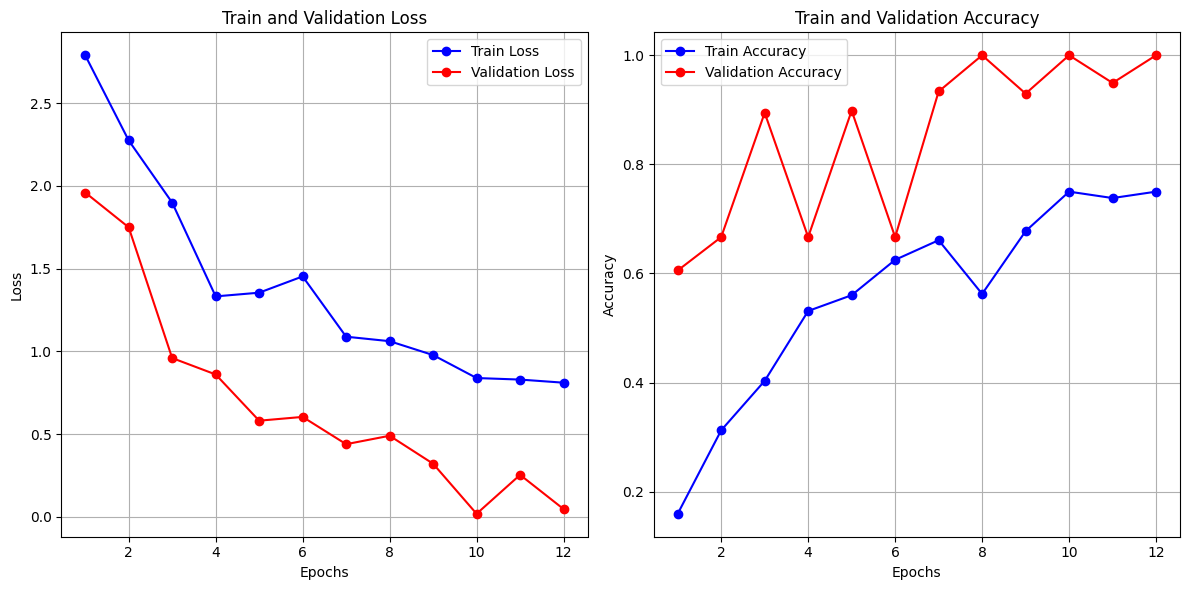

In [ ]:
history_dict = history.history

# Lấy giá trị loss và accuracy cho train và val
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Số lượng epoch
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Vẽ biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Save weights Model

In [ ]:
model.save('/content/drive/MyDrive/UIT/Năm 4/CS406/source_code/weights/resnet50_model.keras')

## Load weights Model

In [ ]:
model.load_weights('/content/drive/MyDrive/UIT/Năm 4/CS406/source_code/weights/resnet50_model.keras')

In [ ]:
import torch
import torchvision.models as models

# Load mô hình ResNet50 với weight đã được huấn luyện sẵn (pretrained)
model = models.resnet50(pretrained=True)

# Nếu bạn muốn load weight từ một file cụ thể (ví dụ: "model_weights.pth")
# model.load_state_dict(torch.load('model_weights.pth'))

# Đặt mô hình ở chế độ evaluation
model.eval()

# In ra thông tin mô hình
print(model)

## Inference

In [ ]:
url = '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/test/0/img_0_1.jpg'

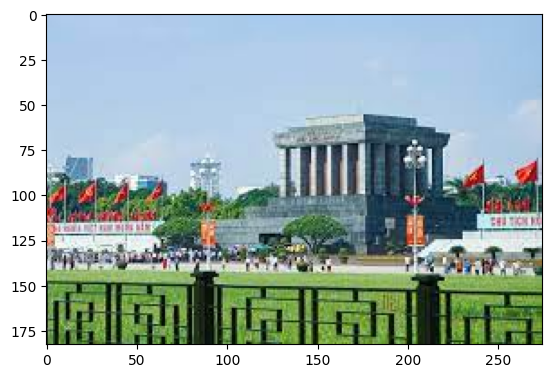

In [ ]:
img = cv2.imread(url)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=np.expand_dims(img,[0])
    img = preprocess_input(img)
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    # label = map_to_id[y_class[0]]
    reversed_dict = {v: k for k, v in train_images.class_indices.items()}
    label = reversed_dict[y_class[0]]
    place = label_map[int(label)]

    return place

In [ ]:
place = output(url)
print(place)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Lăng Bác Hồ


## Result on test data

In [ ]:
labels = []
for item in os.listdir(train_path):
  labels.append(item)

In [ ]:
def read_data(dir_path):
  image_list = []
  y = []
  for label in labels:
    path = os.path.join(dir_path, label)
    for item in os.listdir(path):
      image_list.append(path + '/' + item)
      y.append(int(label))
  return image_list, y

In [ ]:
X_test, y_test = read_data(test_path)
print(len(X_test))
print(len(y_test))

268
268


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=np.expand_dims(img,[0])
    img = preprocess_input(img)
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    # label = map_to_id[y_class[0]]
    reversed_dict = {v: k for k, v in train_images.class_indices.items()}
    label = reversed_dict[y_class[0]]

    return int(label)

In [ ]:
y_pred = []
for item in X_test:
  label = output(item)
  y_pred.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
acc = accuracy_score(y_pred, y_test)
print("Accuracy:", acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.917910447761194
Precision: 0.9167582417582418
Recall: 0.9250605930017695
F1-Score: 0.9169021891357085


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.92      0.75      0.83        16
           2       0.92      0.92      0.92        13
           3       0.93      0.87      0.90        15
           4       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        12
           6       0.79      0.92      0.85        12
           7       0.92      1.00      0.96        12
           8       0.92      1.00      0.96        12
           9       0.92      0.92      0.92        13
          10       1.00      0.87      0.93        15
          11       0.85      0.85      0.85        13
          12       0.77      0.91      0.83        11
          13       0.69      1.00      0.82         9
          14       0.85      1.00      0.92        11
          15       1.00      0.93      0.97        15
          16       1.00      0.93      0.96        14
          17       1.00    

## Prediction

In [ ]:
map_to_id = {0: 0,
             1: 1,
             10: 2,
             11: 3,
             12: 4,
             13: 5,
             14: 6,
             15: 7,
             16: 8,
             17: 9,
             18: 10,
             19: 11,
             2: 12,
             3: 13,
             4: 14,
             5: 15,
             6: 16,
             7: 17,
             8: 18,
             9: 19}
label_map = {
    0 : 'Lăng Bác Hồ',
    1 : 'Tràng An Ninh Bình',
    2 : 'Kinh Thành Huế',
    3 : 'Nhà thờ Đức Bà',
    4 : 'Vịnh Hạ Long',
    5 : 'Dinh Độc Lập',
    6 : 'Thánh Địa Mỹ Sơn',
    7 : 'Hồ Gươm',
    8 : 'Bưu điện trung tâm',
    9 : 'Tượng Chúa Giang Tay Vũng Tàu',
    10: 'Cầu vàng bà nà hills',
    11: 'Cột cờ Lũng Cú',
    12: 'Động Phong nha kẻ bàng',
    13: 'Phố Cổ Hội An',
    14: 'thác Bản Giốc',
    15: 'Nhà Thờ Lớn',
    16: 'Chợ Bến thành',
    17: 'Ga Đà Lạt',
    18: 'Chợ Nổi',
    19: 'Gành đá đĩa'
}
def output(img):
    # img=load_img(location,target_size=(224,224,3))
    img_arr = np.array(img)
    img = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img, (224,224))
    img=img_to_array(img1)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    label = map_to_id[y_class[0]]
    place = label_map[label]

    return place

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.load_weights('/content/drive/MyDrive/UIT/Năm 4/CS406/source_code/weights/mobile_model.keras')





url = '/content/drive/MyDrive/UIT/Năm 4/CS406/DATASET/test/0/img_0_1.jpg'
img = cv2.imread(url)
y_pred = output(img)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


'Lăng Bác Hồ'